In [1]:
import os
import time
import random
import pandas as pd
import numpy as np
import cv2
import torch
from tqdm.auto import tqdm
from PIL import Image
import shutil
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import pandas as pd
df = pd.read_csv('train_solution_bounding_boxes (1).csv')
df.head()

,image,xmin,ymin,xmax,ymax
0,vid_4_1000.jpg,281.259045,187.035071,327.727931,223.225547
1,vid_4_10000.jpg,15.163531,187.035071,120.329957,236.430180
2,vid_4_10040.jpg,239.192475,176.764801,361.968162,236.430180
3,vid_4_10020.jpg,496.483358,172.363256,630.020260,231.539575
4,vid_4_10060.jpg,16.630970,186.546010,132.558611,238.386422


In [7]:
# get image_id
df['image_id'] = df['image'].apply(lambda x: x.split('.')[0])
df['classes'] = 0
df.head(2)

,image,xmin,ymin,xmax,ymax,image_id,classes
0,vid_4_1000.jpg,281.259045,187.035071,327.727931,223.225547,vid_4_1000,0
1,vid_4_10000.jpg,15.163531,187.035071,120.329957,236.430180,vid_4_10000,0


In [9]:
# Define image configuration
IMG_HEIGHT, IMG_WIDTH, NUM_CHANNELS = 380, 676, 3  # Using uppercase for constants by convention

# Define the path to the images folder
IMAGES_FOLDER = 'data/training_images/'  # Also using uppercase as a convention for constants

# Print configuration for confirmation
print(f"Image dimensions: {IMG_HEIGHT}x{IMG_WIDTH}, Channels: {NUM_CHANNELS}")
print(f"Images folder: {IMAGES_FOLDER}")


Image dimensions: 380x676, Channels: 3
Images folder: data/training_images/


In [13]:
# Define image dimensions
img_w, img_h = 676, 380  # Set image width and height based on your specific requirements

# Convert bounding box data to YOLO format
df['x_center'] = ((df['xmin'] + df['xmax']) / 2) / img_w  # Normalize x_center
df['y_center'] = ((df['ymin'] + df['ymax']) / 2) / img_h  # Normalize y_center
df['w'] = (df['xmax'] - df['xmin']) / img_w               # Normalize width
df['h'] = (df['ymax'] - df['ymin']) / img_h               # Normalize height

# Display the first few rows to confirm the conversion
df[['x_center', 'y_center', 'w', 'h']].head()


,x_center,y_center,w,h
0,0.450434,0.539817,0.068741,0.095238
1,0.100217,0.557191,0.155572,0.129987
2,0.444645,0.543678,0.181621,0.157014
3,0.833213,0.531451,0.197540,0.155727
4,0.110347,0.559122,0.171491,0.136422


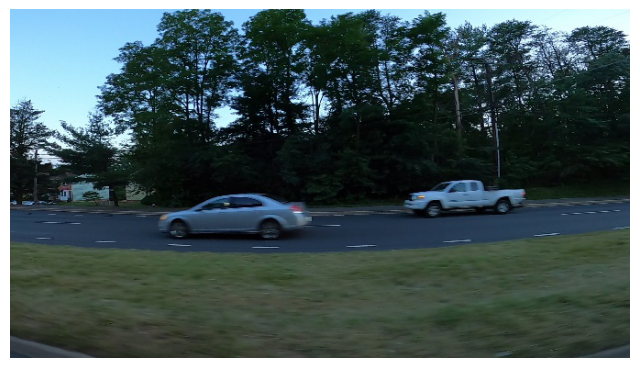

In [26]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Set the path to the folder containing the images
images_folder = 'Downloads/data/training_images/'  # Replace with the actual path if different

# Randomly select an image from the 'image' column in the DataFrame
image = random.choice(df['image'])

# Construct the full path to the image
image_path = os.path.join(images_folder, image)

# Check if the file exists before trying to open it
if os.path.exists(image_path):
    # Open and display the image
    img = Image.open(image_path)
    plt.figure(figsize=(8, 6))  # Set figure size if needed
    plt.axis('off')
    plt.imshow(img)
    plt.show()
else:
    print(f"Image {image} not found in folder {images_folder}.")


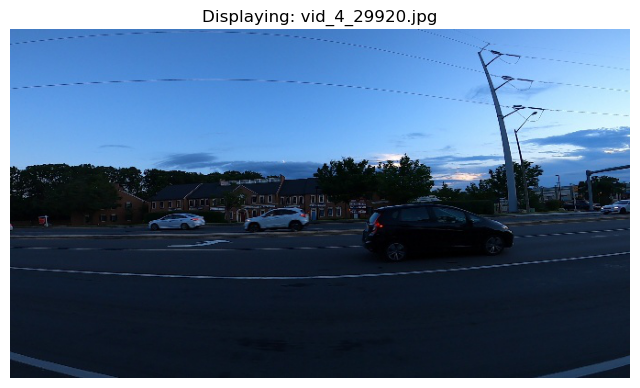

In [30]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Define the images folder path
images_folder = 'Downloads/data/training_images/' # Update the path if necessary

# Check if the 'image' column exists and has data
if 'image' in df.columns and not df['image'].empty:
    # Randomly select an image from the 'image' column in the DataFrame
    image = random.choice(df['image'])
    
    # Construct the full path to the image
    image_path = os.path.join(images_folder, image)
    
    # Attempt to open and display the image
    try:
        img = Image.open(image_path)
        plt.figure(figsize=(8, 6))  # Optional: Set figure size
        plt.axis('off')
        plt.title(f"Displaying: {image}")
        plt.imshow(img)
        plt.show()
    except FileNotFoundError:
        print(f"Error: Image '{image}' not found in folder '{images_folder}'.")
    except Exception as e:
        print(f"An error occurred while opening the image: {e}")
else:
    print("The DataFrame does not contain an 'image' column or it's empty.")


In [38]:
import os
import cv2
import matplotlib.pyplot as plt

# Folder path where images are stored
images_folder = 'Downloads/data/training_images/'  # Update the path if necessary

def draw_bounding_box(idx):
    # Check if the index is valid
    if idx >= len(df) or idx < 0:
        print(f"Index {idx} is out of bounds.")
        return

    # Construct the path to the image file
    image_path = os.path.join(images_folder, df['image'][idx])
    
    # Attempt to read the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Image at index {idx} not found or could not be opened.")
        return

    # Get bounding box coordinates
    x_min = int(df['xmin'][idx])
    y_min = int(df['ymin'][idx])
    x_max = int(df['xmax'][idx])
    y_max = int(df['ymax'][idx])

    # Draw the bounding box
    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

    # Place the label above the bounding box
    cv2.putText(image, 'car', (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Convert image from BGR to RGB for correct color display in Matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.figure(figsize=(8, 6))
    plt.axis('off')
    plt.title(f"Bounding Box for Image Index {idx}")
    plt.imshow(image_rgb)
    plt.show()


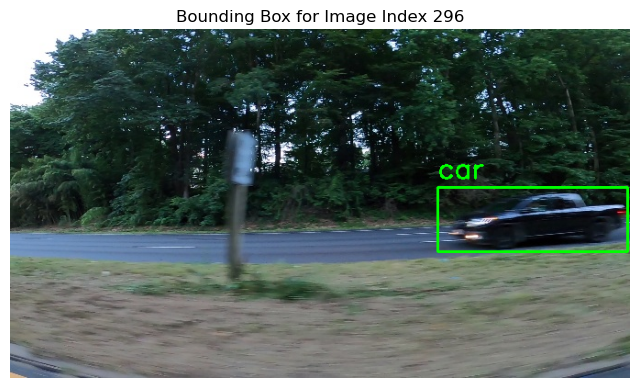

In [40]:
import random

# Check if the DataFrame has any rows
if not df.empty:
    # Generate a random index within the bounds of the DataFrame
    idx = random.randint(0, len(df) - 1)
    
    # Call the function to draw the bounding box
    draw_bounding_box(idx)
else:
    print("The DataFrame is empty. Please check your data.")


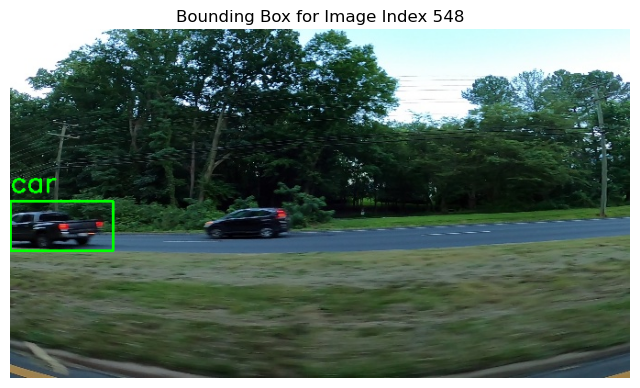

In [42]:
import random

# Check if the DataFrame has any rows
if len(df) > 0:
    # Generate a random index within the bounds of the DataFrame
    idx = random.randrange(0, len(df))
    
    # Call the function to draw the bounding box
    draw_bounding_box(idx)
else:
    print("The DataFrame is empty. Please check your data.")


In [44]:
import os

# Define the annotations folder path
annotations_folder = 'Downloads/data/annotations/'

# Ensure the folder exists, creating it along with any parent directories if necessary
os.makedirs(annotations_folder, exist_ok=True)

print(f"Annotations folder is ready at: {annotations_folder}")


Annotations folder is ready at: Downloads/data/annotations/


In [46]:
import os

# Define a dictionary to store annotations for each image
annotations_dict = {}

# Iterate through the DataFrame to consolidate bounding boxes for each image
for _, row in df.iterrows():
    try:
        # Extract necessary data from each row
        image_file = row['image']
        class_label = int(row['classes'])
        x_center = round(row['x_center'], 6)  # Rounded for better format in YOLO
        y_center = round(row['y_center'], 6)
        w = round(row['w'], 6)
        h = round(row['h'], 6)

        # Initialize the list for the image if not already in the dictionary
        if image_file not in annotations_dict:
            annotations_dict[image_file] = []

        # Append the annotation in YOLO format
        annotations_dict[image_file].append(f"{class_label} {x_center} {y_center} {w} {h}")

    except Exception as e:
        print(f"Error processing row: {row}. Error: {e}")

# Write the annotations to text files in the specified folder
for image_file, annotations in annotations_dict.items():
    # Define the path for each annotation file
    annotation_file = os.path.join(annotations_folder, os.path.splitext(image_file)[0] + '.txt')
    
    try:
        # Write each annotation to the file
        with open(annotation_file, 'w') as f:
            for annotation in annotations:
                f.write(annotation + '\n')
        print(f"Annotations saved for {image_file} in {annotation_file}")
        
    except Exception as e:
        print(f"Error writing file {annotation_file}. Error: {e}")


Annotations saved for vid_4_1000.jpg in Downloads/data/annotations/vid_4_1000.txt
Annotations saved for vid_4_10000.jpg in Downloads/data/annotations/vid_4_10000.txt
Annotations saved for vid_4_10040.jpg in Downloads/data/annotations/vid_4_10040.txt
Annotations saved for vid_4_10020.jpg in Downloads/data/annotations/vid_4_10020.txt
Annotations saved for vid_4_10060.jpg in Downloads/data/annotations/vid_4_10060.txt
Annotations saved for vid_4_10100.jpg in Downloads/data/annotations/vid_4_10100.txt
Annotations saved for vid_4_10120.jpg in Downloads/data/annotations/vid_4_10120.txt
Annotations saved for vid_4_10140.jpg in Downloads/data/annotations/vid_4_10140.txt
Annotations saved for vid_4_1020.jpg in Downloads/data/annotations/vid_4_1020.txt
Annotations saved for vid_4_1040.jpg in Downloads/data/annotations/vid_4_1040.txt
Annotations saved for vid_4_10480.jpg in Downloads/data/annotations/vid_4_10480.txt
Annotations saved for vid_4_10500.jpg in Downloads/data/annotations/vid_4_10500.tx

In [48]:
from sklearn.model_selection import train_test_split
import shutil
import os

# List of images to split
images = list(annotations_dict.keys())

# Split images into training and testing sets
train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)

# Optional: Define folders for saving the split images
train_folder = os.path.join(images_folder, 'train')
test_folder = os.path.join(images_folder, 'test')

# Ensure the folders exist
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# Move images to the corresponding folders (Optional)
for image in train_images:
    src_path = os.path.join(images_folder, image)
    dest_path = os.path.join(train_folder, image)
    shutil.copy(src_path, dest_path)  # Use shutil.move if you want to move instead of copy

for image in test_images:
    src_path = os.path.join(images_folder, image)
    dest_path = os.path.join(test_folder, image)
    shutil.copy(src_path, dest_path)

# Print summary
print(f"Training images: {len(train_images)}, Testing images: {len(test_images)}")


Training images: 284, Testing images: 71


In [50]:
import os

# Define paths for train and test images and annotations
train_images_folder = 'datasets/train_images'
test_images_folder = 'datasets/test_images'
train_annotations_folder = 'datasets/train_annotations'
test_annotations_folder = 'datasets/test_annotations'

# Create the directories if they do not exist
os.makedirs(train_images_folder, exist_ok=True)
os.makedirs(test_images_folder, exist_ok=True)
os.makedirs(train_annotations_folder, exist_ok=True)
os.makedirs(test_annotations_folder, exist_ok=True)

print("Folders for train and test images and annotations have been created.")


Folders for train and test images and annotations have been created.


In [52]:
import shutil
import os

def copy_files(images_list, image_src_folder, annotation_src_folder, image_dest_folder, annotation_dest_folder):
    for image_file in images_list:
        try:
            # Paths for source and destination images
            src_image_path = os.path.join(image_src_folder, image_file)
            annotation_file = os.path.splitext(image_file)[0] + '.txt'
            src_annotation_path = os.path.join(annotation_src_folder, annotation_file)
            dest_image_path = os.path.join(image_dest_folder, image_file)
            dest_annotation_path = os.path.join(annotation_dest_folder, annotation_file)

            # Copy image file if it exists
            if os.path.exists(src_image_path):
                shutil.copy2(src_image_path, dest_image_path)
            else:
                print(f"Warning: Image file {src_image_path} does not exist.")

            # Copy annotation file if it exists
            if os.path.exists(src_annotation_path):
                shutil.copy2(src_annotation_path, dest_annotation_path)
            else:
                print(f"Warning: Annotation file {src_annotation_path} does not exist.")
        
        except Exception as e:
            print(f"Error copying files for {image_file}: {e}")

# Example usage
# copy_files(train_images, images_folder, annotations_folder, train_images_folder, train_annotations_folder)
# copy_files(test_images, images_folder, annotations_folder, test_images_folder, test_annotations_folder)


In [54]:
# Copy files for training and testing sets
print("Copying training files...")
copy_files(train_images, images_folder, annotations_folder, train_images_folder, train_annotations_folder)

print("Copying testing files...")
copy_files(test_images, images_folder, annotations_folder, test_images_folder, test_annotations_folder)

print("File copying complete.")


Copying training files...
Copying testing files...
File copying complete.


In [62]:
import os

# Check train annotations
train_annotation_folder = 'datasets/train_images'  # Update this to your actual path
for file in os.listdir(train_annotation_folder):
    if file.endswith('.txt'):
        with open(os.path.join(train_annotation_folder, file)) as f:
            content = f.read().strip()
            if not content:
                print(f"Empty annotation file: {file}")

# Check test annotations
test_annotation_folder = 'datasets/test_images'  # Update this to your actual path
for file in os.listdir(test_annotation_folder):
    if file.endswith('.txt'):
        with open(os.path.join(test_annotation_folder, file)) as f:
            content = f.read().strip()
            if not content:
                print(f"Empty annotation file: {file}")


In [68]:
import os

def check_empty_annotations(folder):
    empty_files = []
    for file in os.listdir(folder):
        if file.endswith('.txt'):
            with open(os.path.join(folder, file)) as f:
                content = f.read().strip()
                if not content:
                    empty_files.append(file)
    return empty_files

train_annotations_folder = 'datasets/train_images'
test_annotations_folder = 'datasets/test_images'

empty_train_files = check_empty_annotations(train_annotations_folder)
empty_test_files = check_empty_annotations(test_annotations_folder)

print("Empty train annotation files:", empty_train_files)
print("Empty test annotation files:", empty_test_files)


Empty train annotation files: []
Empty test annotation files: []


In [70]:
dummy_annotation = "0 0.5 0.5 0.1 0.1"  # Example dummy bounding box

def fill_empty_annotations(folder):
    for file in os.listdir(folder):
        if file.endswith('.txt'):
            path = os.path.join(folder, file)
            with open(path, 'r+') as f:
                content = f.read().strip()
                if not content:
                    f.write(dummy_annotation)

fill_empty_annotations(train_annotations_folder)
fill_empty_annotations(test_annotations_folder)


In [72]:
from ultralytics import YOLO

model = YOLO('yolov8n.yaml')
try:
    model.val(data='data.yaml', imgsz=676)
    print("Data loading and validation preview succeeded.")
except Exception as e:
    print(f"Data loading error: {e}")


WARNING ⚠️ imgsz=[676] must be multiple of max stride 32, updating to [704]
WARNING ⚠️ validating an untrained model YAML will result in 0 mAP.
Ultralytics 8.3.28 🚀 Python-3.11.9 torch-2.2.2 CPU (Apple M2)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 31,920 gradients, 8.7 GFLOPs


val: Scanning /Users/alekhyakattamuri/datasets/test_images.cache... 0 images, 71

WARNING ⚠️ No labels found in /Users/alekhyakattamuri/datasets/test_images.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.



                 Class     Images  Instances      Box(P          R      mAP50  m

Data loading error: torch.cat(): expected a non-empty list of Tensors
